In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [93]:
df_train= pd.read_csv("train_v9rqX0R.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
df_test= pd.read_csv("test_AbJTz2l.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# **EXPLORATORY DATA ANALYSIS**

In [95]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [97]:
# check unique values in dataset
df_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [98]:
df_train.shape

(8523, 12)

In [99]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**MISSING VALUES**

In [100]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**CHECK FOR CATEGORICAL ATTRIBUTES**

In [101]:
cat_col = []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [102]:
#removing the item identifier and outlet identifier
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [103]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df_train[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

C:\Users\syamk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

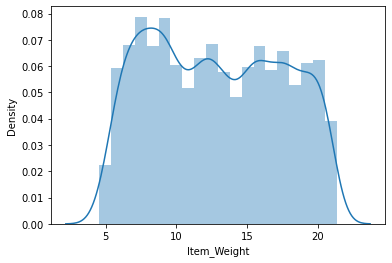

In [104]:
sns.distplot(df_train['Item_Weight'])

In [105]:
#we need to fix the irregularity
df_train['Item_Fat_Content'].unique() 

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [106]:
#replacing 'low','LF to 'Low Fat'. we need only one Low fat record. 
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace(to_replace=['low fat','LF'],value='Low Fat')

df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace(to_replace=['low fat','LF'],value='Low Fat')

In [107]:
#replacing reg into Regular
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace(to_replace='reg',value='Regular')

df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace(to_replace='reg',value='Regular')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

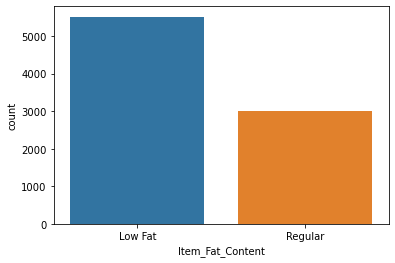

In [108]:
sns.countplot(x=df_train['Item_Fat_Content'])

**COUNT PLOT**

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

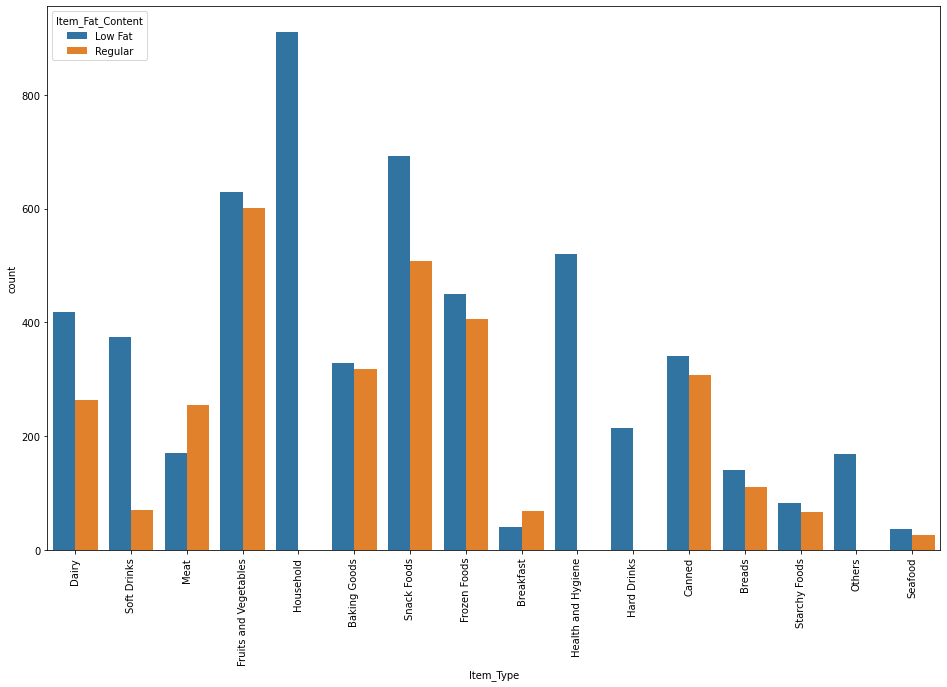

In [109]:
plt.figure(figsize=(16,10))
sns.countplot(x=df_train['Item_Type'],hue=df_train['Item_Fat_Content'])
plt.xticks(rotation=90)
df_train['Item_Type'].unique()

From the above count plot it is clear that Meat has regular fat than anyother food category

**BAR PLOT**

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

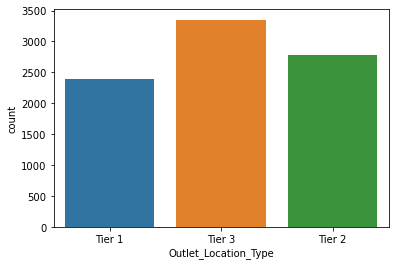

In [110]:
sns.countplot(x=df_train['Outlet_Location_Type'])

Most of the stores are located in tier 3 cities.

**COUNT PLOT**

C:\Users\syamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

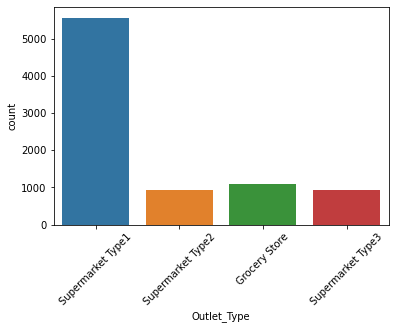

In [111]:
sns.countplot(df_train['Outlet_Type'])
plt.xticks(rotation=45)

SuperMarket Type1 is most number of outlet types category.

C:\Users\syamk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


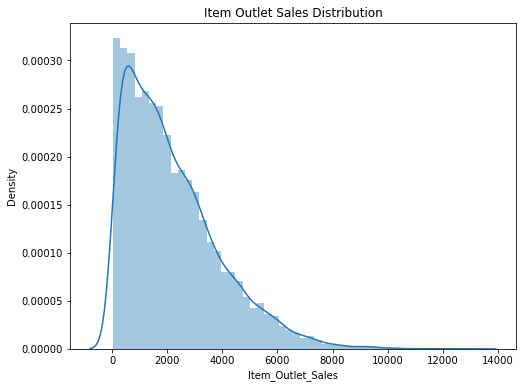

In [112]:
#Analysis of outlet sales
plt.figure(figsize = (8,6))
sns.distplot(df_train['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')
plt.show()

Most Outlet sales in range of 1000 to 2000 and its a right skewed distribution.

**HEAT MAP**

<AxesSubplot:>

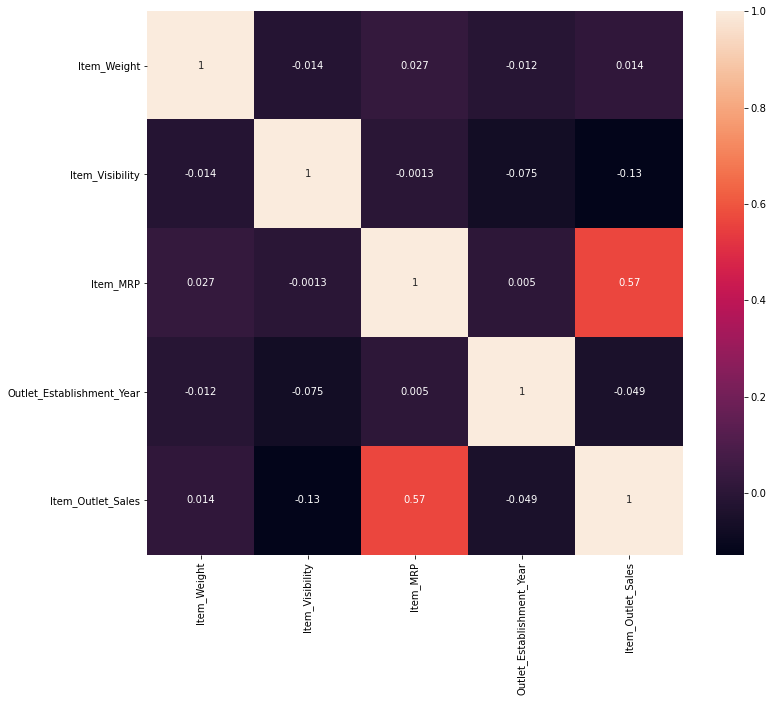

In [113]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot=True)

There is no two categories have niether high nor low correlation

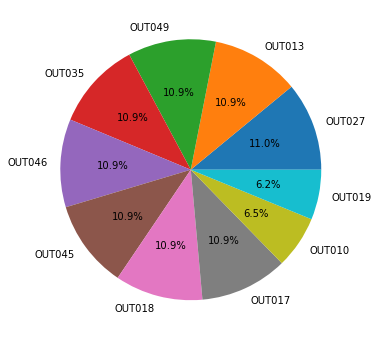

In [114]:
plt.figure(figsize=(6,6))
df_train['Outlet_Identifier'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

There are 10 outlets which are almost balanced except for two outlets

# **PREPROCESSING**

**HANDLING NULL VALUES**

In [115]:
# Use the mean to replace the null values in Item_Weight feature
df_train.Item_Weight = df_train.Item_Weight.fillna(df_train.Item_Weight.mean())
df_test.Item_Weight = df_test.Item_Weight.fillna(df_test.Item_Weight.mean())

In [116]:
df_train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [117]:
df_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [118]:
#here we can replace the null values with the mode because it is a categorical column
df_train.Outlet_Size = df_train.Outlet_Size.fillna(df_train.Outlet_Size.mode()[0])
df_test.Outlet_Size = df_test.Outlet_Size.fillna(df_test.Outlet_Size.mode()[0])

In [119]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [120]:
df_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [121]:
#apply Label Encoder to convert Categorical ordered features to numeric
encode = LabelEncoder()
list_transform = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']

for i in list_transform:
    df_train[i] = encode.fit_transform(df_train[i])
    
for i in list_transform:
    df_test[i] = encode.fit_transform(df_test[i])

In [122]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052


In [123]:
#drop non needed features
df_train = df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
df_test= df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [124]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052


In [125]:
#apply one hot encoder to convert non-order categorical featuers
dummies1 = pd.get_dummies(df_train.Item_Type)
dummies2 = pd.get_dummies(df_test.Item_Type)

In [126]:
df_train = pd.concat([df_train, dummies1], axis=1)
df_test = pd.concat([df_test, dummies2], axis=1)

In [127]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


In [128]:
#drop the main feature and one dummy feature
df_train.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)
df_test.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)

In [129]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,Breads,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19.20,1,0.000000,182.0950,1,2,0,732.3800,0,0,...,0,1,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,1,994.7052,0,0,...,0,0,0,0,1,0,0,0,0,0


In [130]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,20.750000,0,0.007565,107.8622,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,8.300000,1,0.038428,87.3198,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0,0.099575,241.7538,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.695633,1,0.118599,234.2300,1,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**FEATURE SCAILING**

In [131]:
FEATURES = [col for col in df_train.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier']]
cat_features = [col for col in FEATURES if df_train[col].nunique() < 10]
cont_features = [col for col in FEATURES if df_train[col].nunique() >= 10]

In [132]:
cat_features

['Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks']

In [133]:
cont_features

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [134]:
X = df_train[cont_features]
X.head()

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614


In [135]:
test2 = df_test[cont_features]
test2.head()

,Item_Weight,Item_Visibility,Item_MRP
0,20.750000,0.007565,107.8622
1,8.300000,0.038428,87.3198
2,14.600000,0.099575,241.7538
3,7.315000,0.015388,155.0340
4,12.695633,0.118599,234.2300


In [136]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
test2 = scaler.fit_transform(test2)

In [137]:
X = pd.DataFrame(X, columns=cont_features)
test2 = pd.DataFrame(test2, columns=cont_features)

In [138]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP
0,-0.841872,-0.970732,1.747454
1,-1.641706,-0.908111,-1.489023
2,1.098554,-0.956917,0.010040
3,1.500838,-1.281758,0.660050
4,-0.929428,-1.281758,-1.399220


In [139]:
test2.head()

,Item_Weight,Item_Visibility,Item_MRP
0,1.897460e+00,-1.134077,-0.536555
1,-1.035530e+00,-0.531850,-0.868937
2,4.486336e-01,0.661316,1.629848
3,-1.267578e+00,-0.981416,0.226697
4,-5.230960e-14,1.032540,1.508110


In [140]:
X = pd.concat([X, df_train[cat_features]], axis=1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,-0.841872,-0.970732,1.747454,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.641706,-0.908111,-1.489023,1,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.098554,-0.956917,0.010040,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.500838,-1.281758,0.660050,1,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.929428,-1.281758,-1.399220,0,0,2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [141]:
y = df_train.Item_Outlet_Sales
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [142]:
test2 = pd.concat([test2, df_test[cat_features]], axis=1)
test2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,1.897460e+00,-1.134077,-0.536555,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.035530e+00,-0.531850,-0.868937,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.486336e-01,0.661316,1.629848,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.267578e+00,-0.981416,0.226697,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-5.230960e-14,1.032540,1.508110,1,1,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**SPLITING THE DATASET INTO TRAINING AND TEST DATASET**

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

In [144]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
3865,-0.511763,0.686309,0.526380,1,1,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6191,-0.941259,0.637508,1.084514,0,1,2,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,-1.797887,-0.470875,0.335531,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5388,1.276032,-1.281758,1.334696,0,1,2,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1484,0.921076,-0.650288,0.820977,0,2,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [145]:
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
4931,3.886425e-01,0.461834,0.298172,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4148,4.035383e-14,-1.096957,-1.227558,0,1,2,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7423,-3.212695e-01,-0.937885,-0.181948,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4836,-6.300813e-01,-1.281758,0.034087,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
944,1.926785e+00,-0.326933,0.868055,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [146]:
y_train.head()

3865     175.7712
6191    3145.9050
5584    5077.3908
5388    4965.5364
1484    3848.3240
Name: Item_Outlet_Sales, dtype: float64

In [147]:
y_test

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
          ...    
2310    2067.3090
2229    4933.5780
6546    3139.9128
7652    1062.6168
7811    4170.5712
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

**MODELING**

**LINEAR REGRESSION MODEL**

In [148]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [149]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [150]:
y_pred

array([2296.99056896, 2544.78131427, 1952.80181176, ..., 2560.39521515,
        711.14496274, 2316.90977007])

In [151]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

50.88

In [152]:
from sklearn import metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1190


**DECISION TREE MODEL**

In [153]:
from sklearn.tree import DecisionTreeRegressor
dec_regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
dec_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [154]:
# Predicting the test set results
d_y_pred = dec_regressor.predict(X_test)
d_y_pred

array([2571.24951579, 1076.06937436, 1947.4840724 , ..., 2818.18537598,
        702.7706294 , 2381.5207515 ])

In [155]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1190


**RANDOM FOREST MODEL**

In [156]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [157]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([2611.5073009 , 1574.91847547, 2119.51426368, ..., 2870.43462536,
        763.99442367, 2379.11628867])

In [158]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1054


**SVR MODEL**

In [159]:
from sklearn.svm import SVR
svr = SVR(gamma='auto', kernel='poly', C=15)
svr.fit(X_train,y_train)

SVR(C=15, gamma='auto', kernel='poly')

In [160]:
y_pred = svr.predict(X_test)
y_pred

array([1761.70404125, 1729.94094931, 1703.35054438, ..., 1819.17323494,
       1409.48311561, 1763.21160474])

In [161]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, svr.predict(X_train))))

RMSE : 1495


From the models here Decision tree have least RSME 

In [162]:
submission= pd.read_csv("sample_submission_8RXa3c6.csv")

In [163]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [164]:
submission.shape

(5681, 3)

In [165]:
df_test.shape

(5681, 22)

In [166]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,20.750000,0,0.007565,107.8622,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,8.300000,1,0.038428,87.3198,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0,0.099575,241.7538,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.695633,1,0.118599,234.2300,1,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5677,7.600000,1,0.142991,169.1448,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5678,10.000000,0,0.073529,118.7440,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5679,15.300000,1,0.000000,214.6218,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [168]:
predictions= dec_regressor.predict(df_test)

C:\Users\syamk\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [169]:
submission.drop('Item_Outlet_Sales',axis=1,inplace= True)

In [170]:
submission['Item_Outlet_Sales']= predictions

In [171]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2303.170757
1,FDW14,OUT017,2303.170757
2,NCN55,OUT010,468.108743
3,FDQ58,OUT017,2303.170757
4,FDY38,OUT027,4957.968097


In [172]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2303.170757
1,FDW14,OUT017,2303.170757
2,NCN55,OUT010,468.108743
3,FDQ58,OUT017,2303.170757
4,FDY38,OUT027,4957.968097


In [173]:
submission.to_csv('my_submission_final.csv',index=False)